In [1]:
# Select Environment(conda_kipoi-shared__env__kipoi-py3-keras2)
import os
import sys
import time
import h5py
import torch
import scipy.io
import numpy as np
from collections import Counter
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
from chipseq_utils import *

# kipoi
import kipoi
import kipoi_interpret
from kipoi_veff.utils.plot import seqlogo_heatmap

# Gradient-based methods
from kipoi_interpret.importance_scores.gradient import Gradient, GradientXInput
from kipoi_interpret.importance_scores.referencebased import DeepLift

# tf-modisco
import modisco
import modisco.visualization
from modisco.visualization import viz_sequence

# tf-modisco workflow
import modisco.backend
import modisco.nearest_neighbors
import modisco.affinitymat
import modisco.affinitymat.core
import modisco.tfmodisco_workflow.seqlets_to_patterns
import modisco.tfmodisco_workflow.workflow
import modisco.tfmodisco_workflow
import modisco.aggregator
import modisco.cluster
import modisco.cluster.core
import modisco.cluster.phenograph.core
import modisco.cluster.phenograph.cluster
import modisco.value_provider
import modisco.core
import modisco.coordproducers
import modisco.metaclusterers
import modisco.clusterinit.memeinit
import modisco.util

/home/ubuntu/anaconda3/envs/kipoi-shared__envs__kipoi-py3-keras2/lib/python3.6/site-packages/kipoi_veff/external/concise/seqplotting_deps.py:34: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/home/ubuntu/anaconda3/envs/kipoi-shared__envs__kipoi-py3-keras2/lib/python3.6/site-packages/kipoi_veff/external/concise/seqplotting_deps.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)
TF-MoDISco is using the TensorFlow backend.
/home/ubuntu/anaconda3/envs/kipoi-shared__envs__kipoi-py3-keras2/lib/python3.6/site-packages/ten

In [2]:
### checks
# kipoi.list_models()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [3]:
### set the path
#data_dir = '../data/TF-MoDISco/ARID3A_K562_ARID3A_(sc-8821)_Stanford_AC.seq.gz'
# data_dir = '../data/TF-MoDISco/ELK1_GM12878_ELK1_(1277-1)_Stanford_AC.seq.gz'
data_dir = '../../../out/importance scores/DeepBind/'
result_dir = '../../../out/modisco/DeepBind/'

### Load datasets

In [4]:
with open(data_dir + 'ARID3A_onehot.npy', 'rb') as f:
    x_data = np.load(f) 
with open(data_dir + 'ARID3A_scores.npy', 'rb') as f:
    scores = np.load(f) 
with open(data_dir + 'ARID3A_hyp_scores.npy', 'rb') as f:
    hyp_scores = np.load(f)

### TF-MoDISco workflow

MEMORY 1.700831232
On task ARID3A
Computing windowed sums on original
Generating null dist
peak(mu)= -5.6606531143187e-06
Computing threshold
Thresholds from null dist were -1.912172794342041  and  0.00019407272338867188
Passing windows frac was 0.4943020491242474 , which is above  0.2 ; adjusting
Final raw thresholds are -0.9715485394001024  and  0.9715485394001024
Final transformed thresholds are -0.7999999389123466  and  0.7999999389123466


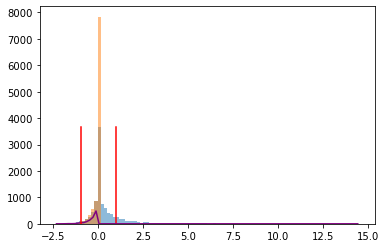

Got 118188 coords
After resolving overlaps, got 118188 seqlets
Across all tasks, the weakest transformed threshold used was: 0.7998999389123466
MEMORY 2.189684736
118188 identified in total
min_metacluster_size_frac * len(seqlets) = 1181 is more than min_metacluster_size=100.
Using it as a new min_metacluster_size
Reducing weak_threshold_for_counting_sign to match weakest_transformed_thresh, from 0.8 to 0.7998999389123466
2 activity patterns with support >= 1181 out of 2 possible patterns
Metacluster sizes:  [97389, 20799]
Idx to activities:  {0: '1', 1: '-1'}
MEMORY 2.190065664
On metacluster 1
Metacluster size 20799 limited to 20000
Relevant tasks:  ('ARID3A',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 20000
(Round 1) Computing coarse affmat
MEMORY 2.190065664
Beginning embedding computation
Computing embeddings
Finished embedding computation in 4.53 s
Starting affinity matrix computations
Normalization computed in 0.46 s
Cosine simila

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.8342621846715836


  2%|▏         | 1/50 [00:00<00:41,  1.18it/s]

Quality: 0.8342689206226475


  4%|▍         | 2/50 [00:01<00:36,  1.30it/s]

Quality: 0.8345355797310745


 68%|██████▊   | 34/50 [00:24<00:10,  1.52it/s]

Quality: 0.8345929682005176


100%|██████████| 50/50 [00:37<00:00,  1.35it/s]

Got 26 clusters after round 1
Counts:
{23: 77, 8: 253, 6: 292, 14: 190, 5: 329, 21: 89, 11: 224, 1: 359, 9: 227, 15: 167, 2: 355, 10: 225, 7: 256, 4: 341, 3: 354, 24: 75, 0: 624, 20: 95, 16: 119, 22: 77, 18: 98, 19: 97, 25: 22, 13: 213, 17: 99, 12: 216}
MEMORY 2.622738432
(Round 1) Aggregating seqlets in each cluster
MEMORY 2.622738432
Aggregating for cluster 0 with 624 seqlets
MEMORY 2.622738432


Trimming eliminated 0 seqlets out of 624
Skipped 31 seqlets
Skipped 2 seqlets
Dropping cluster 0 with 591 seqlets due to sign disagreement
Aggregating for cluster 1 with 359 seqlets
MEMORY 2.626936832
Trimming eliminated 0 seqlets out of 359
Skipped 10 seqlets
Dropping cluster 1 with 349 seqlets due to sign disagreement
Aggregating for cluster 2 with 355 seqlets
MEMORY 2.626936832
Trimming eliminated 0 seqlets out of 355
Skipped 8 seqlets
Dropping cluster 2 with 347 seqlets due to sign disagreement
Aggregating for cluster 3 with 354 seqlets
MEMORY 2.626936832
Trimming eliminated 0 seqlets out of 354
Skipped 13 seqlets
Skipped 1 seqlets
Dropping cluster 3 with 340 seqlets due to sign disagreement
Aggregating for cluster 4 with 341 seqlets
MEMORY 2.627477504
Trimming eliminated 0 seqlets out of 341
Skipped 11 seqlets
Dropping cluster 4 with 330 seqlets due to sign disagreement
Aggregating for cluster 5 with 329 seqlets
MEMORY 2.628288512
Trimming eliminated 0 seqlets out of 329
Skipped 4

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7052551066755723
Quality: 0.7054297061434367
Quality: 0.7057323457398008


 12%|█▏        | 6/50 [00:00<00:00, 52.43it/s]

Quality: 0.7060778480263796


 60%|██████    | 30/50 [00:00<00:00, 51.15it/s]

Quality: 0.7060955652123078


100%|██████████| 50/50 [00:00<00:00, 52.08it/s]

Got 13 clusters after round 2
Counts:
{11: 4, 10: 9, 0: 63, 1: 57, 5: 28, 2: 44, 7: 20, 4: 32, 8: 14, 3: 42, 6: 23, 12: 2, 9: 10}
MEMORY 2.393485312
(Round 2) Aggregating seqlets in each cluster
MEMORY 2.393485312
Aggregating for cluster 0 with 63 seqlets
MEMORY 2.393485312


Trimming eliminated 0 seqlets out of 63
Dropping cluster 0 with 63 seqlets due to sign disagreement
Aggregating for cluster 1 with 57 seqlets
MEMORY 2.393485312
Trimming eliminated 0 seqlets out of 57
Aggregating for cluster 2 with 44 seqlets
MEMORY 2.393485312
Trimming eliminated 0 seqlets out of 44
Aggregating for cluster 3 with 42 seqlets
MEMORY 2.393485312
Trimming eliminated 0 seqlets out of 42
Aggregating for cluster 4 with 32 seqlets
MEMORY 2.393485312
Trimming eliminated 0 seqlets out of 32
Aggregating for cluster 5 with 28 seqlets
MEMORY 2.393485312
Trimming eliminated 0 seqlets out of 28
Dropping cluster 5 with 28 seqlets due to sign disagreement
Aggregating for cluster 6 with 23 seqlets
MEMORY 2.393485312
Trimming eliminated 0 seqlets out of 23
Aggregating for cluster 7 with 20 seqlets
MEMORY 2.393485312
Trimming eliminated 0 seqlets out of 20
Aggregating for cluster 8 with 14 seqlets
MEMORY 2.393485312
Trimming eliminated 0 seqlets out of 14
Aggregating for cluster 9 with 1

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.8918395838910881


100%|██████████| 50/50 [01:27<00:00,  1.74s/it]

Got 26 clusters after round 1
Counts:
{3: 769, 1: 888, 14: 438, 25: 85, 5: 734, 10: 562, 23: 171, 19: 296, 16: 421, 9: 576, 7: 677, 8: 645, 17: 367, 11: 461, 2: 828, 4: 762, 24: 138, 15: 427, 12: 454, 13: 447, 20: 218, 0: 1082, 21: 199, 6: 711, 18: 318, 22: 198}
MEMORY 2.780147712
(Round 1) Aggregating seqlets in each cluster
MEMORY 2.780147712
Aggregating for cluster 0 with 1082 seqlets
MEMORY 2.780147712


Trimming eliminated 0 seqlets out of 1082
Skipped 65 seqlets
Removed 2 duplicate seqlets
Aggregating for cluster 1 with 888 seqlets
MEMORY 2.785943552
Trimming eliminated 0 seqlets out of 888
Skipped 62 seqlets
Aggregating for cluster 2 with 828 seqlets
MEMORY 2.786627584
Trimming eliminated 0 seqlets out of 828
Skipped 60 seqlets
Aggregating for cluster 3 with 769 seqlets
MEMORY 2.788118528
Trimming eliminated 0 seqlets out of 769
Skipped 44 seqlets
Aggregating for cluster 4 with 762 seqlets
MEMORY 2.78943744
Trimming eliminated 0 seqlets out of 762
Skipped 48 seqlets
Removed 1 duplicate seqlets
Aggregating for cluster 5 with 734 seqlets
MEMORY 2.791165952
Trimming eliminated 0 seqlets out of 734
Skipped 45 seqlets
Aggregating for cluster 6 with 711 seqlets
MEMORY 2.792517632
Trimming eliminated 0 seqlets out of 711
Skipped 46 seqlets
Removed 1 duplicate seqlets
Aggregating for cluster 7 with 677 seqlets
MEMORY 2.794012672
Trimming eliminated 0 seqlets out of 677
Skipped 13 seqlets
Ag

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.8876782478556231


  6%|▌         | 3/50 [00:04<01:15,  1.61s/it]

Quality: 0.8878732561703303


 28%|██▊       | 14/50 [00:22<00:58,  1.64s/it]

Quality: 0.8878833807885682


 32%|███▏      | 16/50 [00:26<01:03,  1.87s/it]

Quality: 0.8879358408146926


 34%|███▍      | 17/50 [00:28<01:01,  1.86s/it]

Quality: 0.8879436721410564


100%|██████████| 50/50 [01:21<00:00,  1.62s/it]

Got 24 clusters after round 2
Counts:
{7: 672, 11: 509, 2: 822, 14: 417, 6: 693, 1: 845, 12: 473, 20: 225, 19: 265, 9: 591, 16: 381, 17: 351, 10: 558, 15: 409, 21: 175, 8: 667, 13: 432, 3: 741, 0: 938, 22: 107, 5: 713, 4: 736, 18: 282, 23: 77}
MEMORY 2.772291584
(Round 2) Aggregating seqlets in each cluster
MEMORY 2.772291584
Aggregating for cluster 0 with 938 seqlets
MEMORY 2.772291584


Trimming eliminated 0 seqlets out of 938
Skipped 19 seqlets
Removed 5 duplicate seqlets
Removed 1 duplicate seqlets
Aggregating for cluster 1 with 845 seqlets
MEMORY 2.772291584
Trimming eliminated 0 seqlets out of 845
Removed 29 duplicate seqlets
Aggregating for cluster 2 with 822 seqlets
MEMORY 2.772291584
Trimming eliminated 0 seqlets out of 822
Removed 2 duplicate seqlets
Aggregating for cluster 3 with 741 seqlets
MEMORY 2.772557824
Trimming eliminated 0 seqlets out of 741
Removed 1 duplicate seqlets
Aggregating for cluster 4 with 736 seqlets
MEMORY 2.773868544
Trimming eliminated 0 seqlets out of 736
Removed 10 duplicate seqlets
Aggregating for cluster 5 with 713 seqlets
MEMORY 2.775760896
Trimming eliminated 0 seqlets out of 713
Aggregating for cluster 6 with 693 seqlets
MEMORY 2.777923584
Trimming eliminated 0 seqlets out of 693
Removed 3 duplicate seqlets
Aggregating for cluster 7 with 672 seqlets
MEMORY 2.779004928
Trimming eliminated 0 seqlets out of 672
Aggregating for clust

In [6]:
tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size = 6,
    flank_size = 2,
    target_seqlet_fdr=0.15,
    seqlets_to_patterns_factory=modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
#         initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(
#             #meme_command="meme", base_outdir="meme_out",   
#             #max_num_seqlets_to_use specifies the maximum number of seqlets to use
#             # with MEME (this is to speed up MEME in the cases where the number of seqlets is
#             #  very large)
#             max_num_seqlets_to_use=10000,
#             nmotifs=10,
#             n_jobs=4),
        #use_louvain=False,
        #Adjust trim_to_window_size and initial_flank_to_add
        # according to how big you expect
        # the core motif to be; default value is 10
        trim_to_window_size=6,
        initial_flank_to_add=2,
        #final_flank_to_add=5,
        #kmer_len, num_gaps and num_mismatches are used to
        # derive kmer embeddings for coarse-grained affinity
        # matrix calculation. kmer_len=6, num_gaps=1
        # and num_mismatches=0 means
        # that kmer embeddings using 6-mers with 1 gap will be
        # used.
        kmer_len=5,
        num_gaps=1,
        num_mismatches=0,
        final_min_cluster_size=20), )(
    task_names = ["ARID3A"],
    contrib_scores = {'ARID3A': scores},                
    hypothetical_contribs = {'ARID3A': hyp_scores},
    one_hot = x_data)
    #null_per_pos_scores={'task0': nulldist_perposimp})

### Save results for future use

In [7]:
grp = h5py.File(result_dir + 'ARID3A_modisco.hdf5')
tfmodisco_results.save_hdf5(grp)

### Analyze results

Metaclusters heatmap


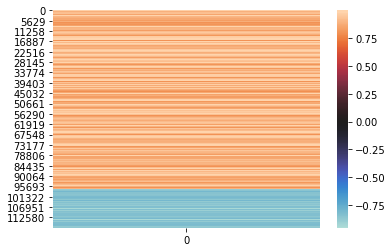

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 3298
Hypothetical scores:


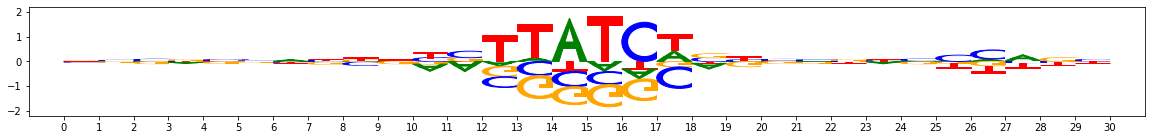

Actual importance scores:


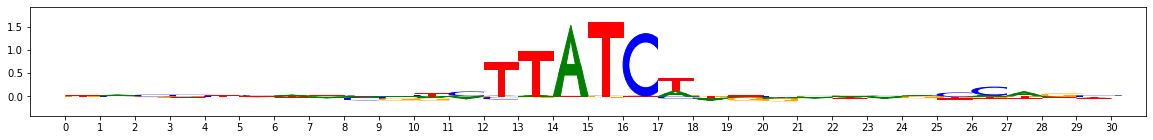

onehot, fwd and rev:


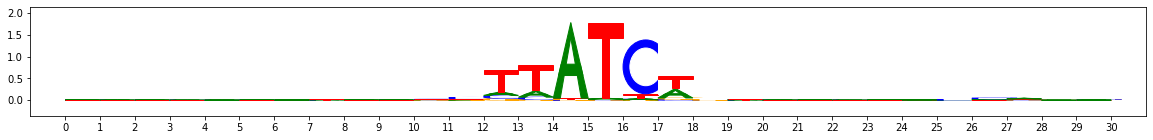

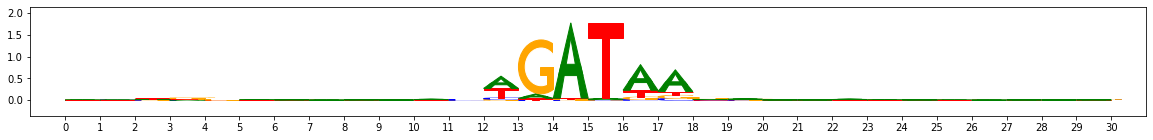

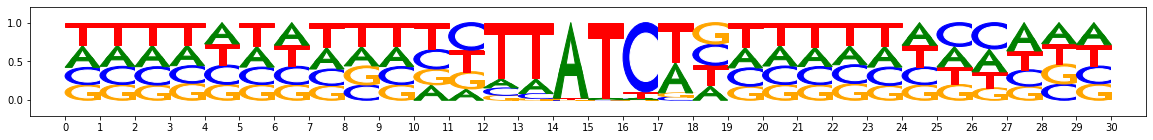

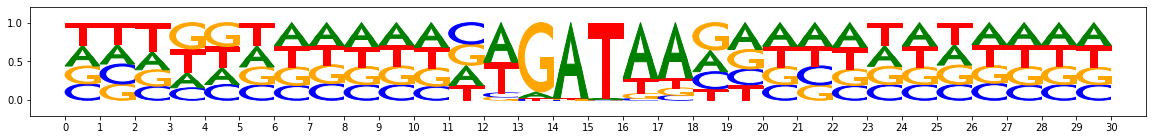

metacluster_0 pattern_1
total seqlets: 994
Hypothetical scores:


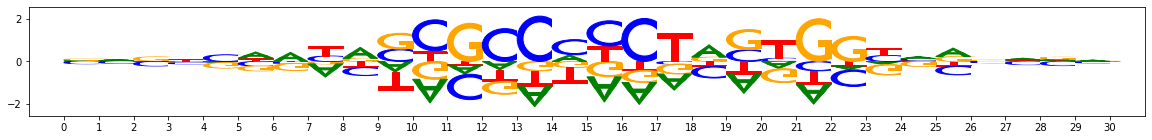

Actual importance scores:


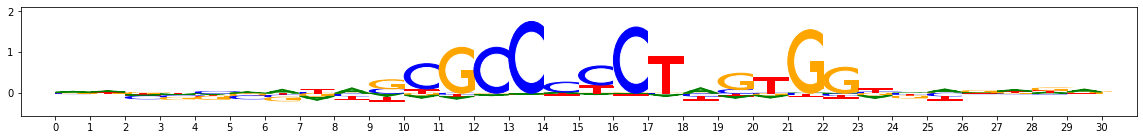

onehot, fwd and rev:


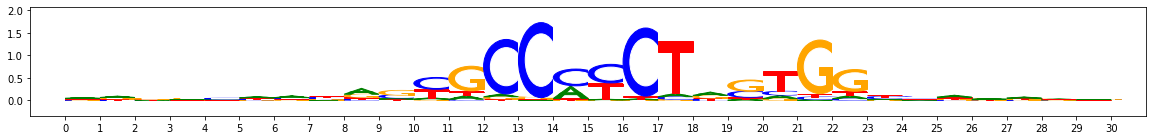

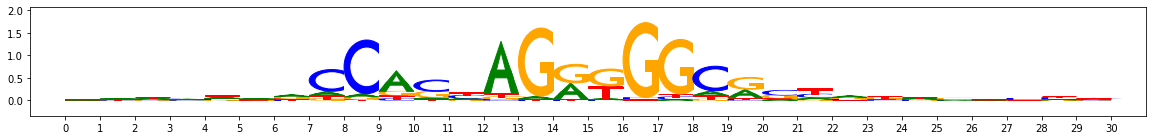

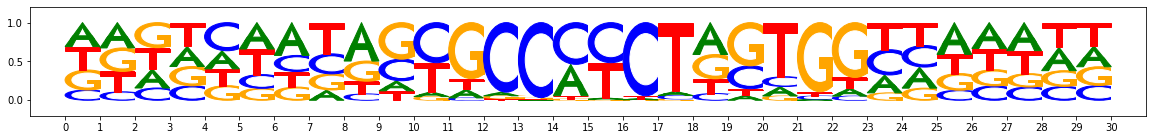

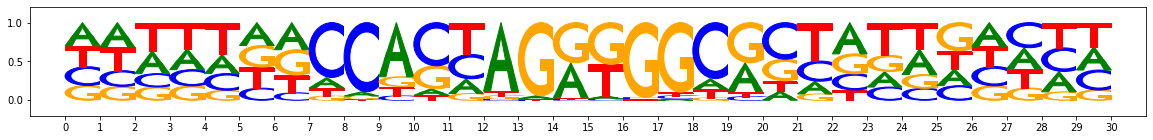

metacluster_0 pattern_2
total seqlets: 927
Hypothetical scores:


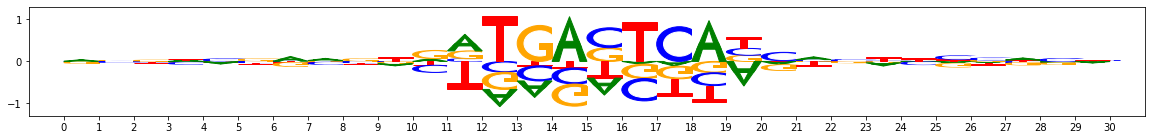

Actual importance scores:


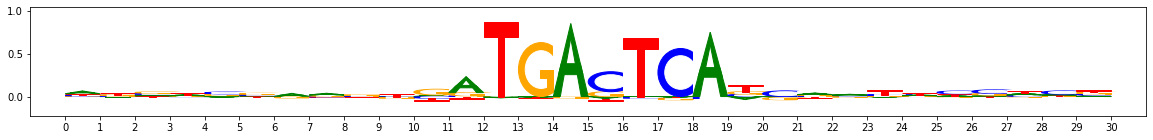

onehot, fwd and rev:


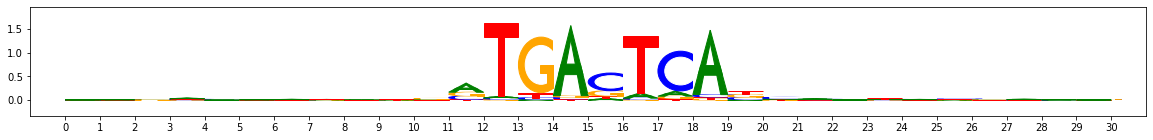

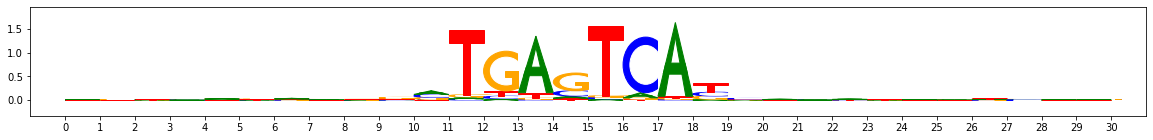

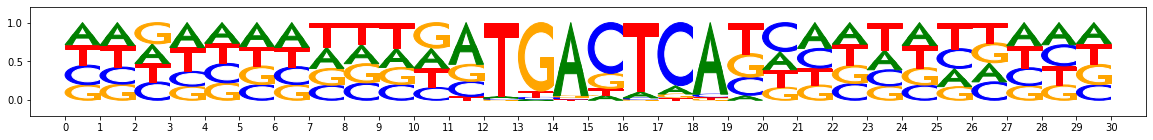

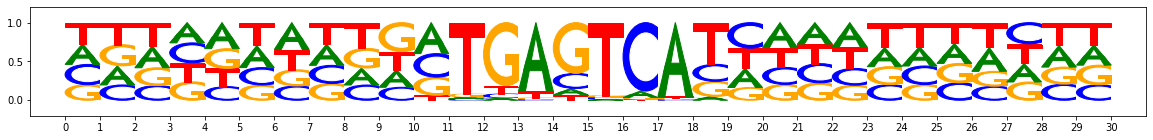

metacluster_0 pattern_3
total seqlets: 889
Hypothetical scores:


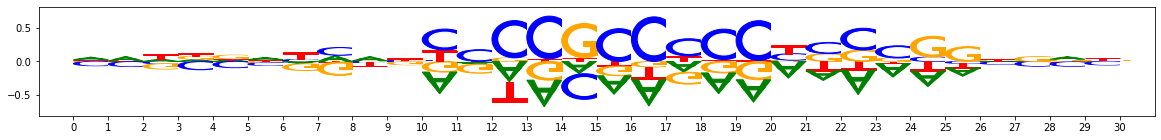

Actual importance scores:


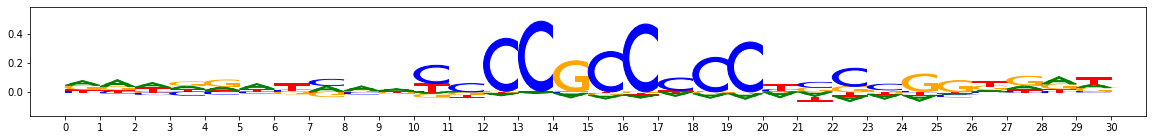

onehot, fwd and rev:


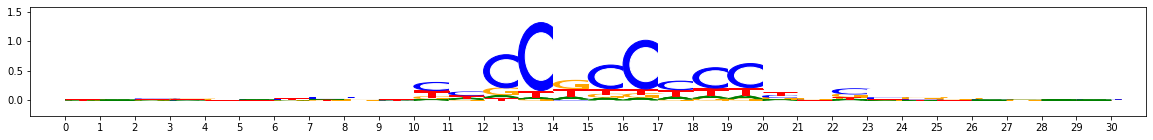

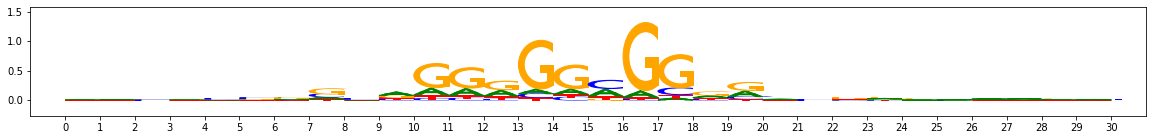

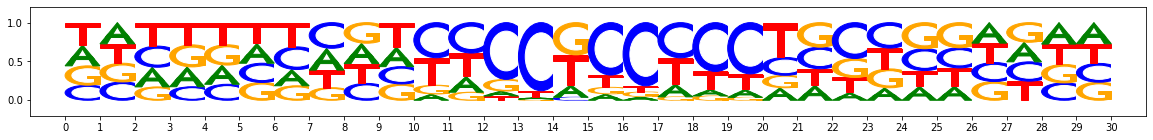

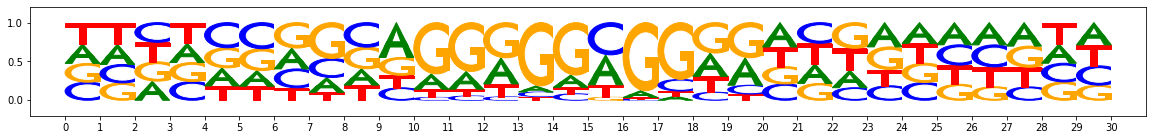

metacluster_0 pattern_4
total seqlets: 803
Hypothetical scores:


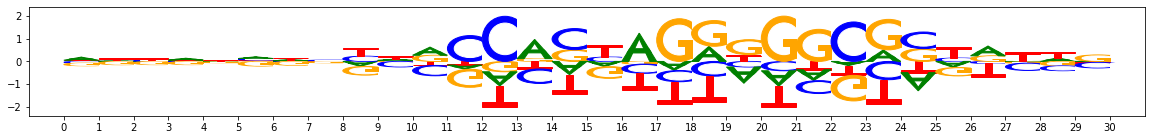

Actual importance scores:


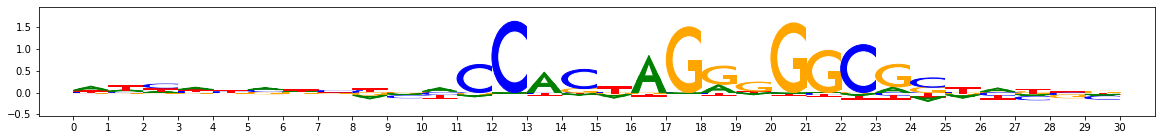

onehot, fwd and rev:


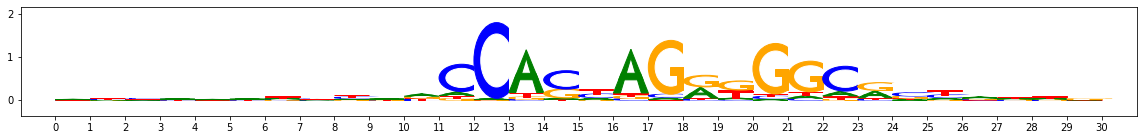

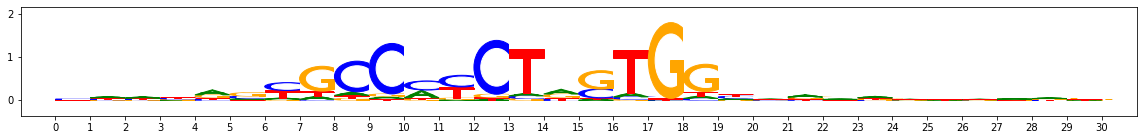

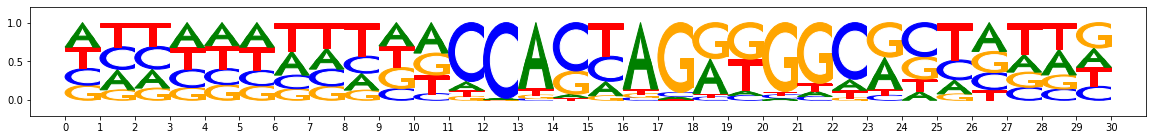

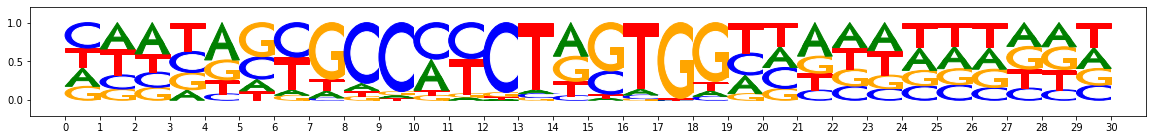

metacluster_0 pattern_5
total seqlets: 713
Hypothetical scores:


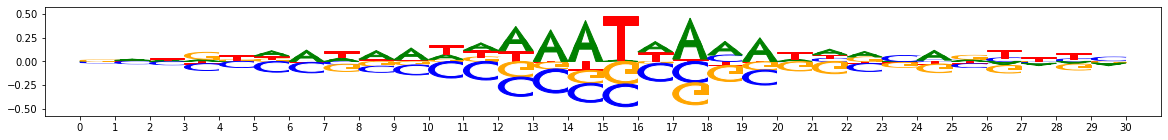

Actual importance scores:


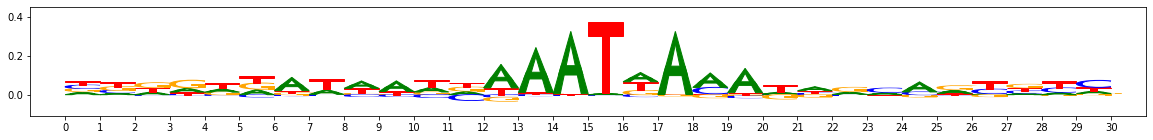

onehot, fwd and rev:


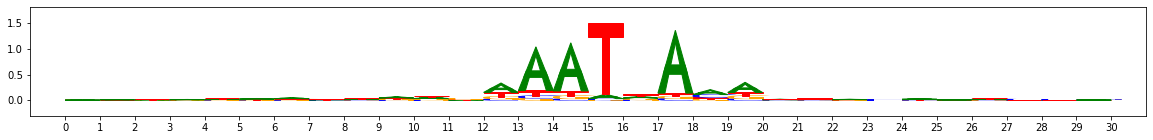

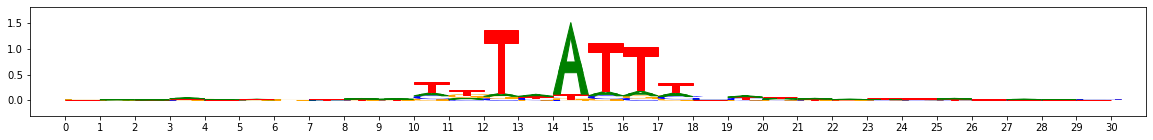

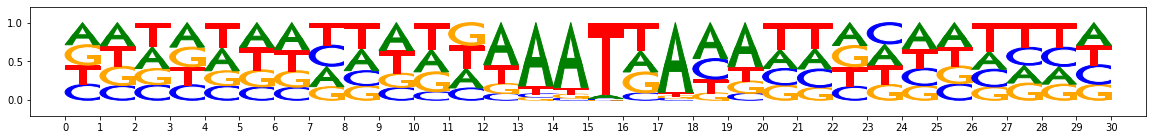

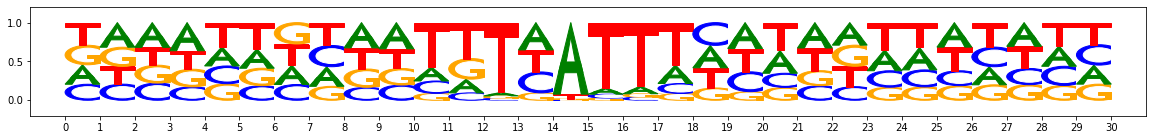

metacluster_0 pattern_6
total seqlets: 493
Hypothetical scores:


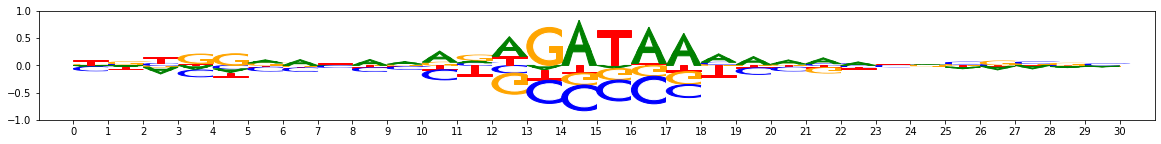

Actual importance scores:


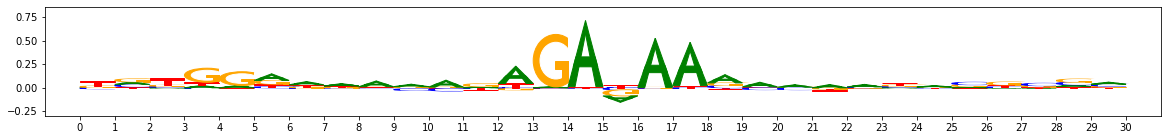

onehot, fwd and rev:


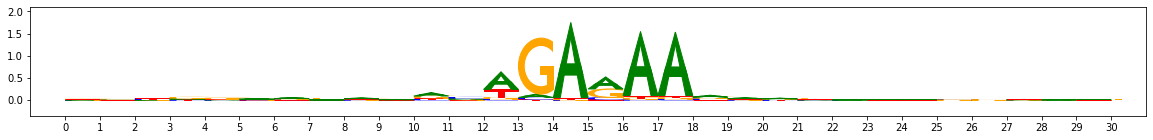

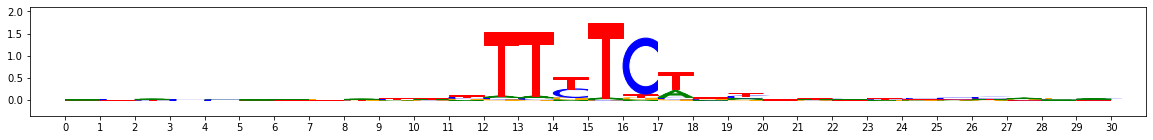

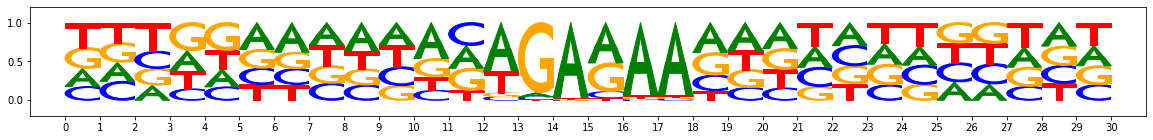

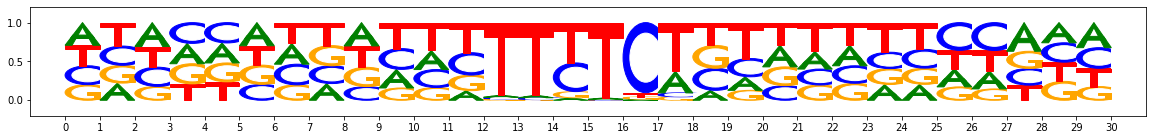

metacluster_0 pattern_7
total seqlets: 466
Hypothetical scores:


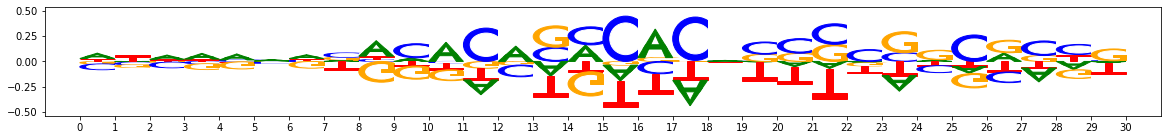

Actual importance scores:


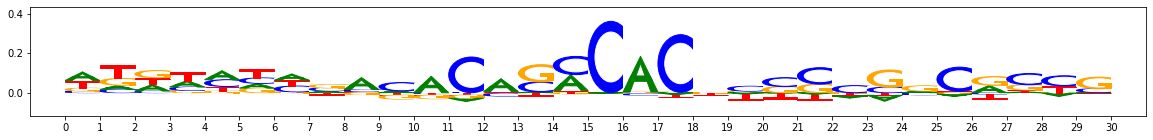

onehot, fwd and rev:


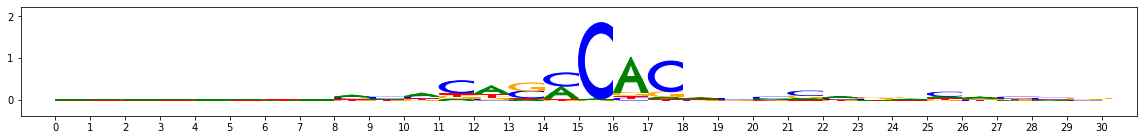

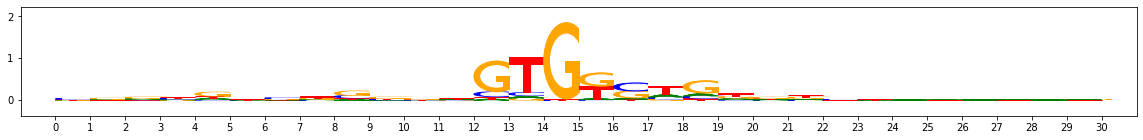

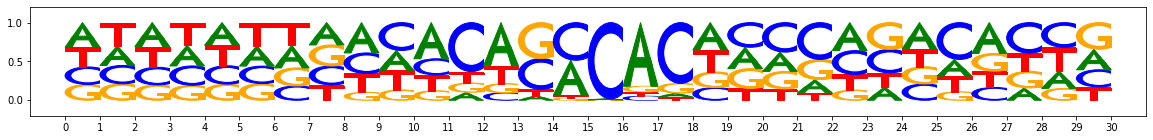

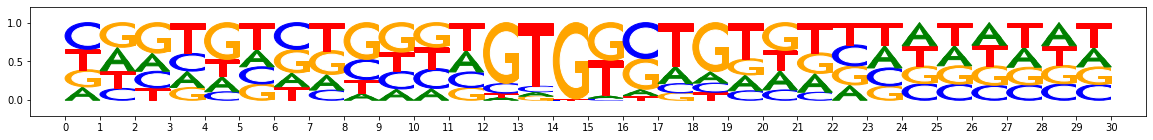

metacluster_0 pattern_8
total seqlets: 432
Hypothetical scores:


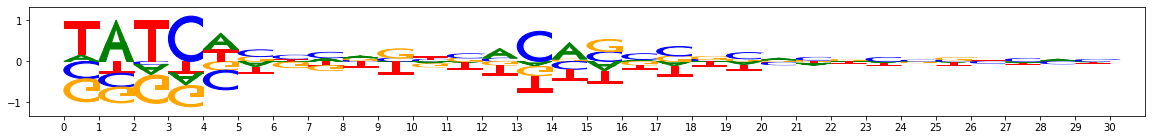

Actual importance scores:


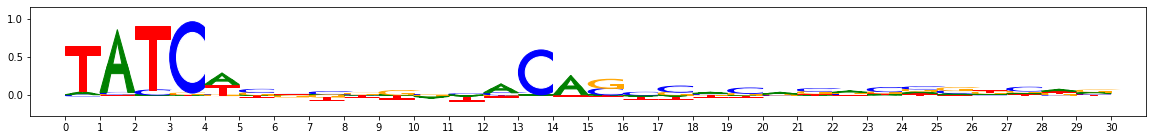

onehot, fwd and rev:


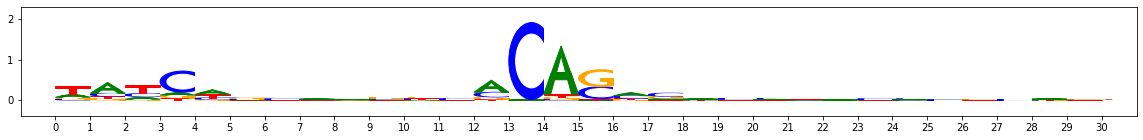

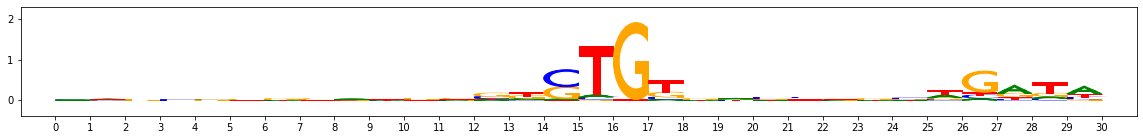

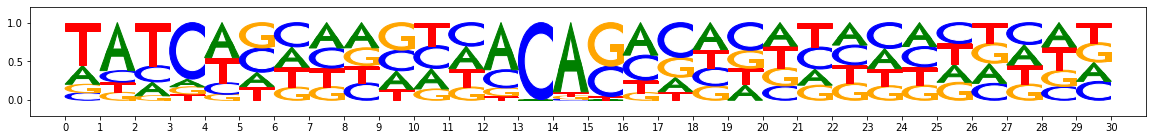

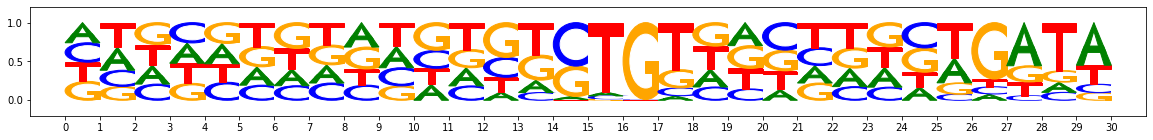

metacluster_0 pattern_9
total seqlets: 390
Hypothetical scores:


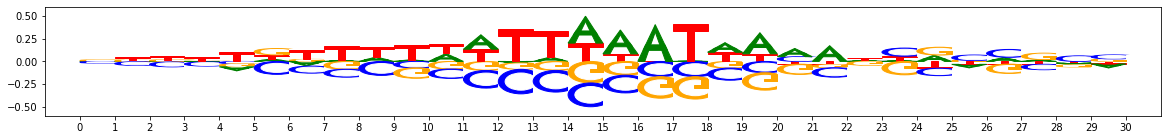

Actual importance scores:


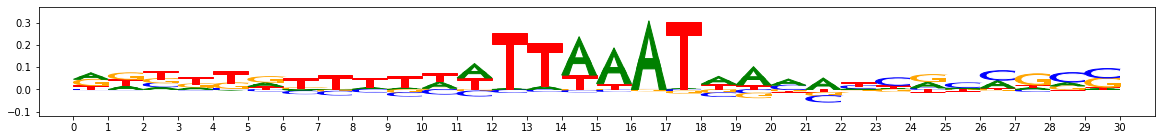

onehot, fwd and rev:


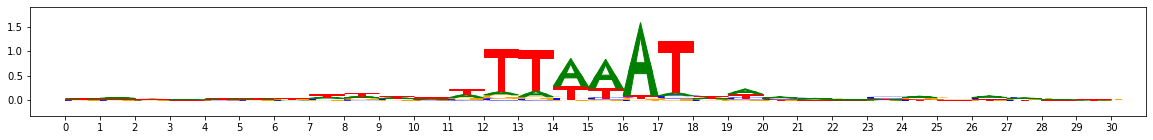

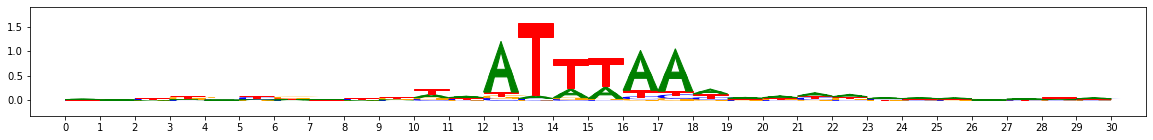

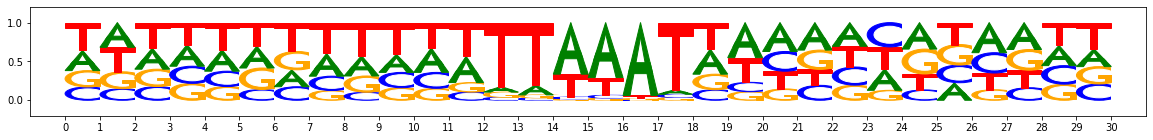

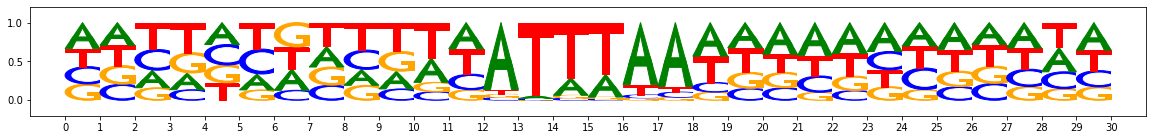

metacluster_0 pattern_10
total seqlets: 346
Hypothetical scores:


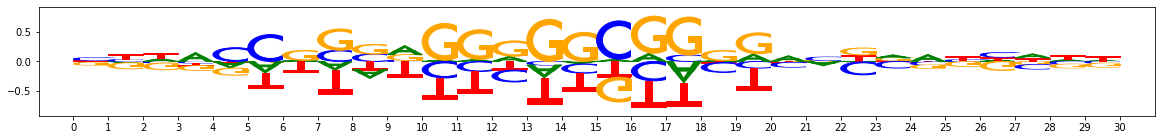

Actual importance scores:


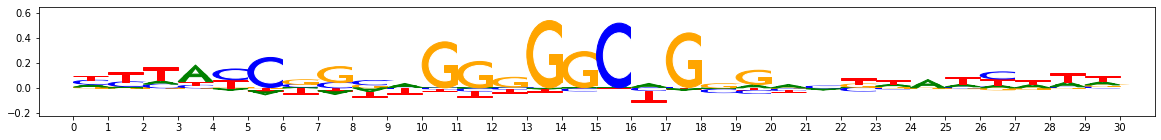

onehot, fwd and rev:


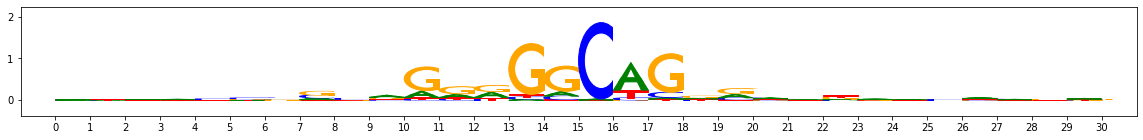

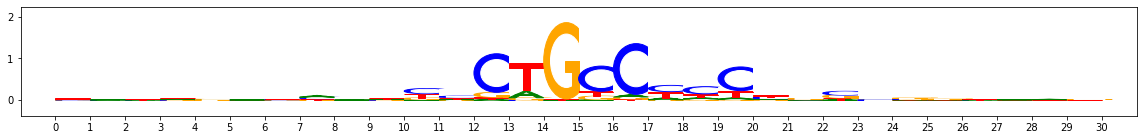

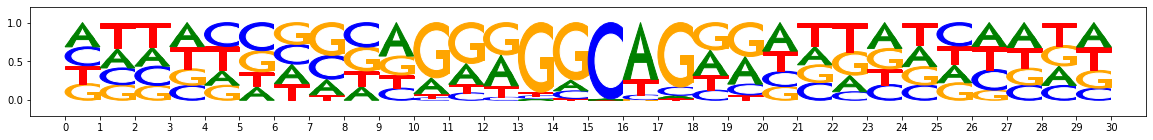

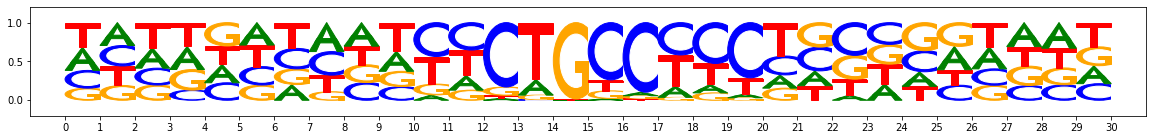

metacluster_0 pattern_11
total seqlets: 319
Hypothetical scores:


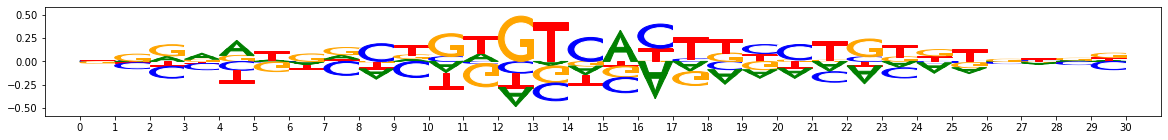

Actual importance scores:


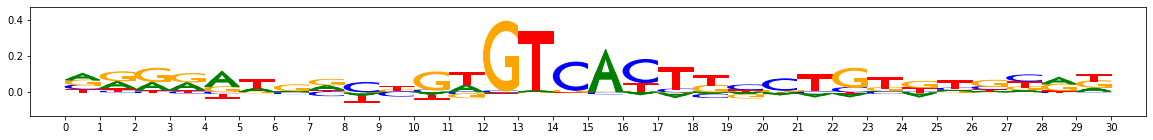

onehot, fwd and rev:


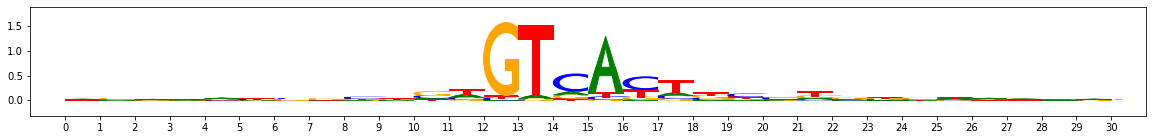

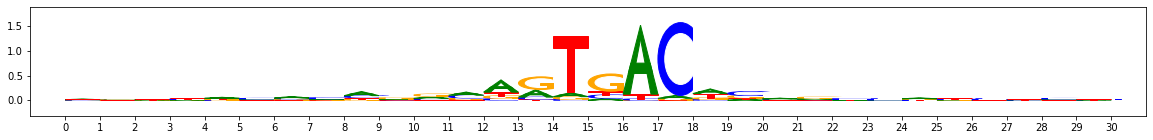

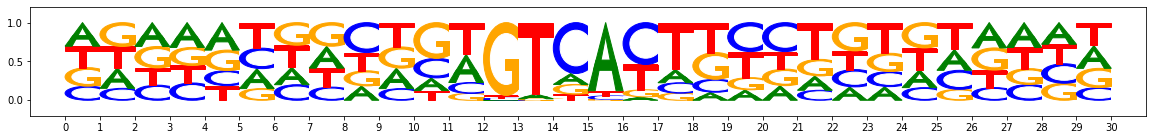

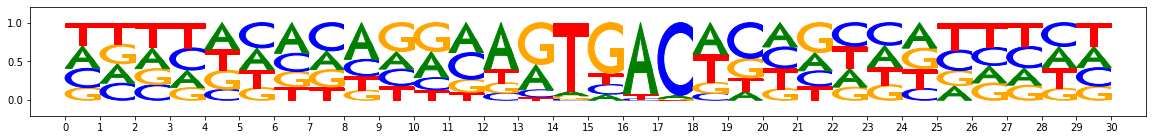

metacluster_0 pattern_12
total seqlets: 178
Hypothetical scores:


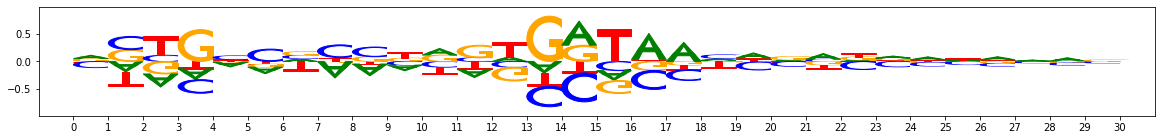

Actual importance scores:


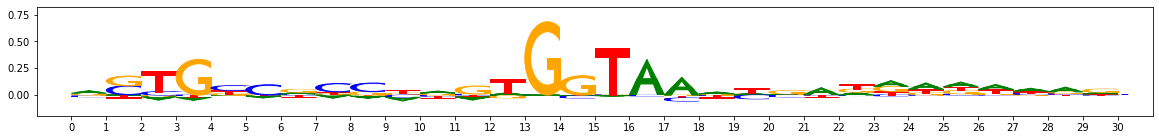

onehot, fwd and rev:


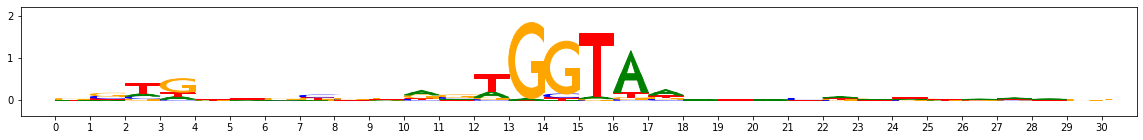

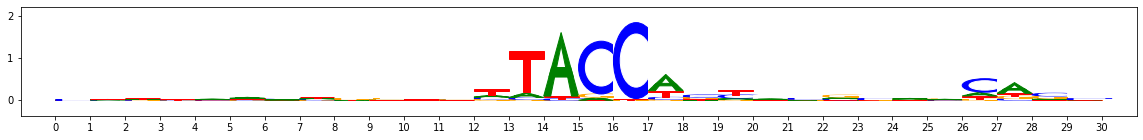

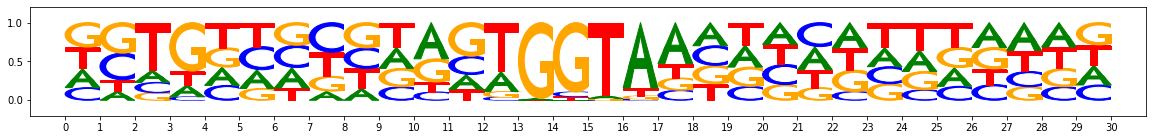

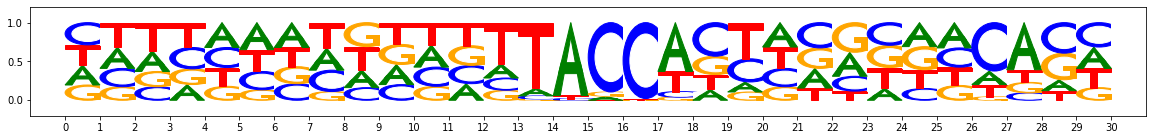

metacluster_0 pattern_13
total seqlets: 161
Hypothetical scores:


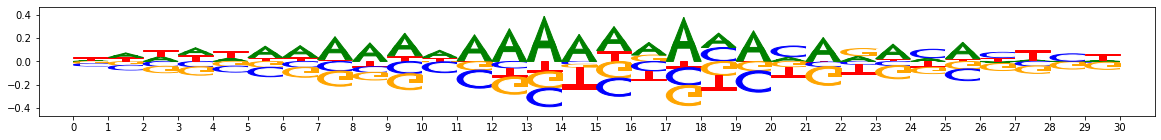

Actual importance scores:


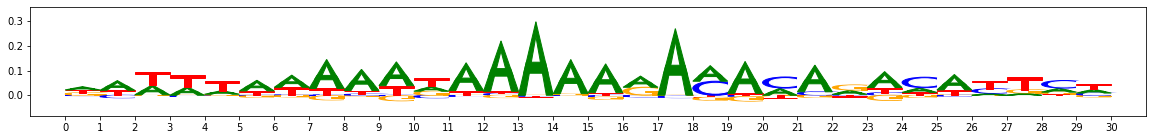

onehot, fwd and rev:


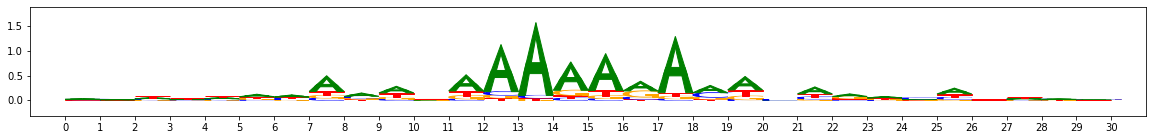

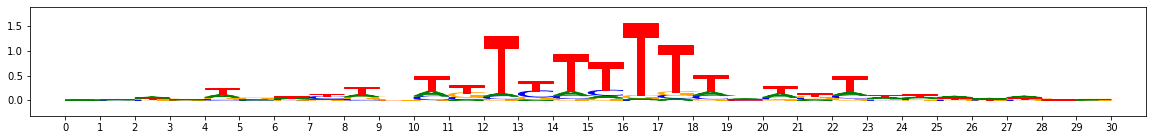

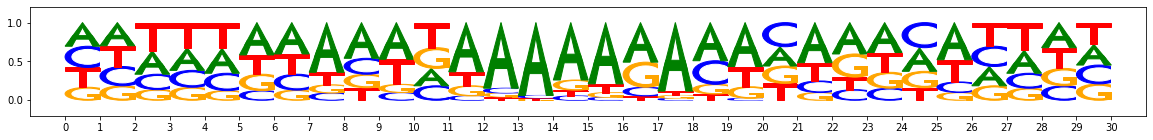

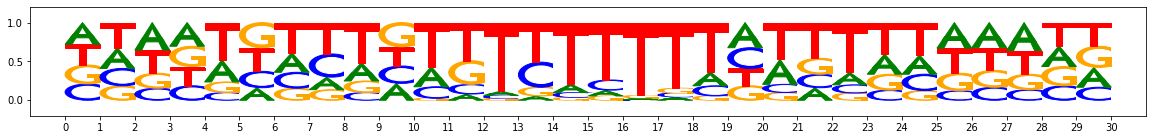

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 111
Hypothetical scores:


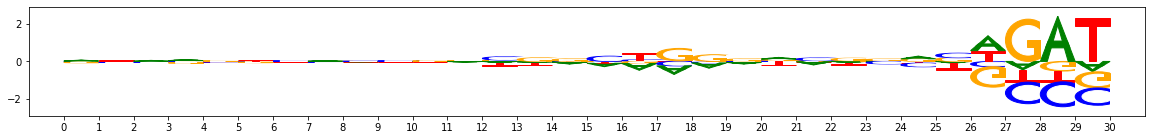

Actual importance scores:


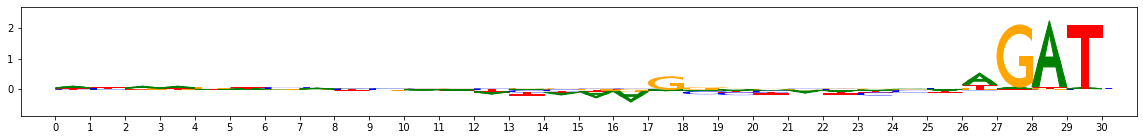

onehot, fwd and rev:


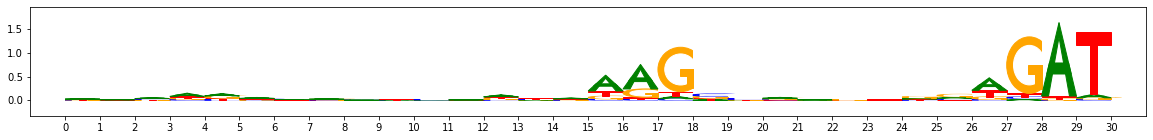

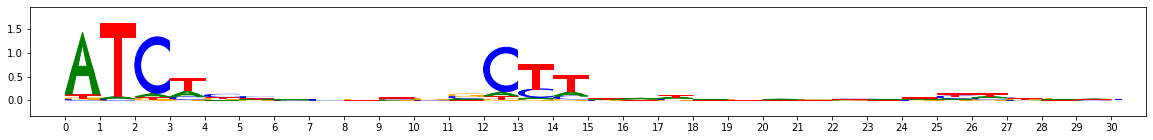

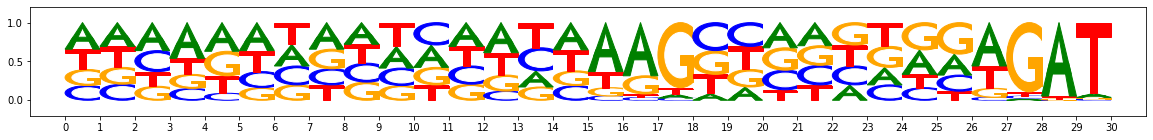

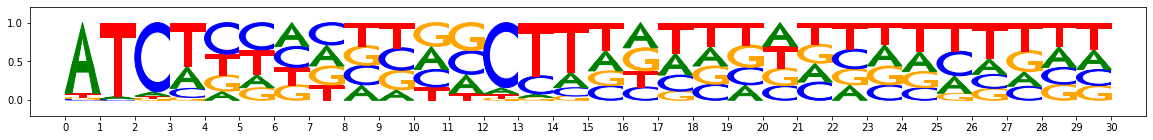

metacluster_1 pattern_1
total seqlets: 99
Hypothetical scores:


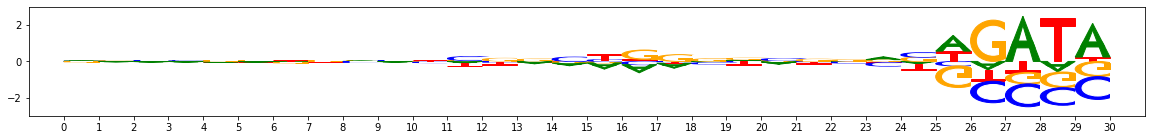

Actual importance scores:


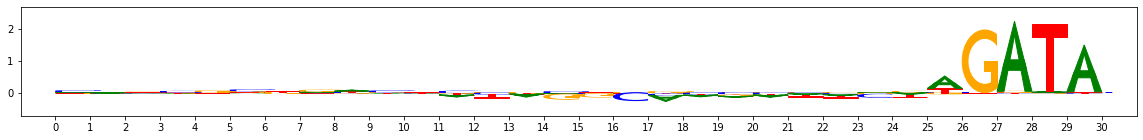

onehot, fwd and rev:


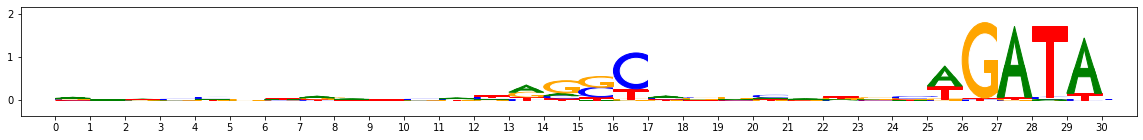

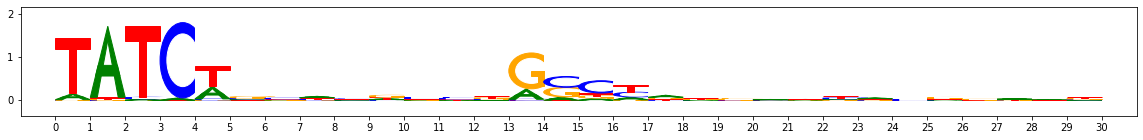

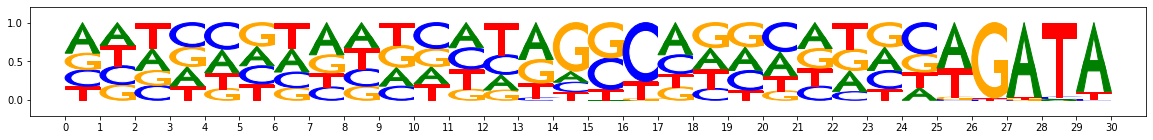

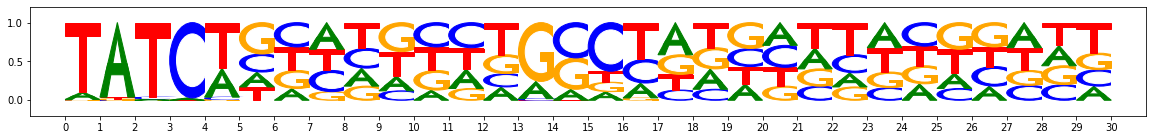

In [16]:
hdf5_results = h5py.File(result_dir + "ARID3A_modisco.hdf5","r")

print("Metaclusters heatmap")
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        print("Hypothetical scores:")
        viz_sequence.plot_weights(pattern["ARID3A_hypothetical_contribs"]["fwd"])
        print("Actual importance scores:")
        viz_sequence.plot_weights(pattern["ARID3A_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background))
        viz_sequence.plot_weights(pattern["sequence"]["fwd"]) 
        viz_sequence.plot_weights(pattern["sequence"]["rev"]) 
        
hdf5_results.close()